<a href="https://colab.research.google.com/github/cwattsnogueira/rating-predictor-spam-detection-review-summarizer/blob/main/06_eda_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Engineered Features

This notebook explores the engineered features used for fake review detection and rating prediction. It helps validate assumptions, identify patterns, and prepare for modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet("/content/engineered_features.parquet")
print("Data loaded:", df.shape)

Data loaded: (9480, 47)


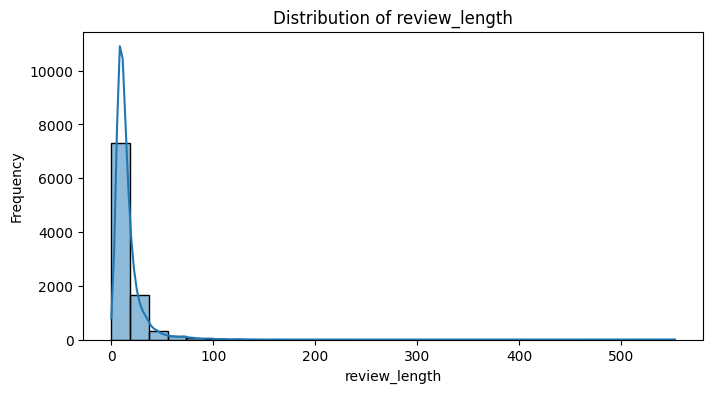

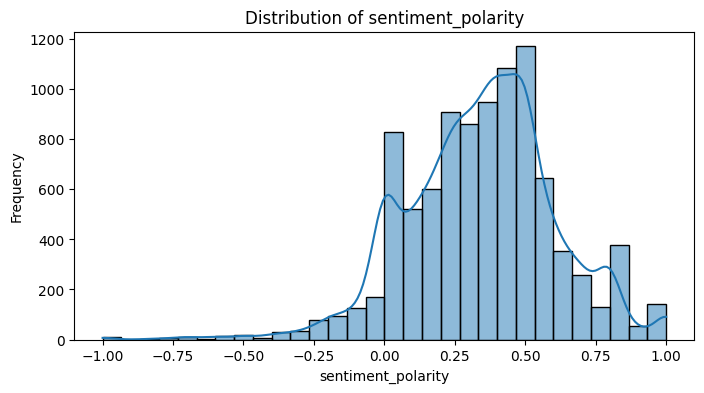

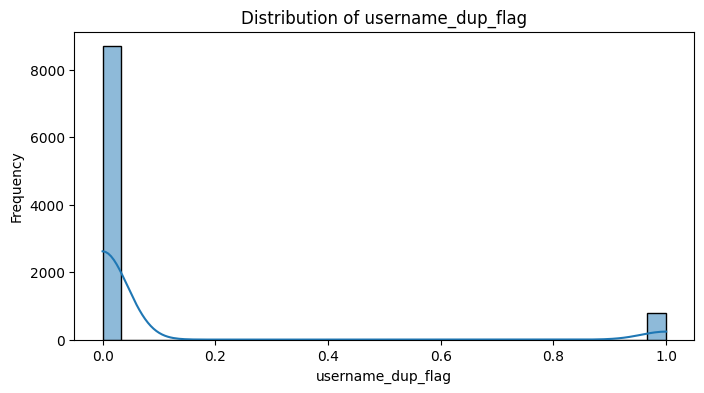

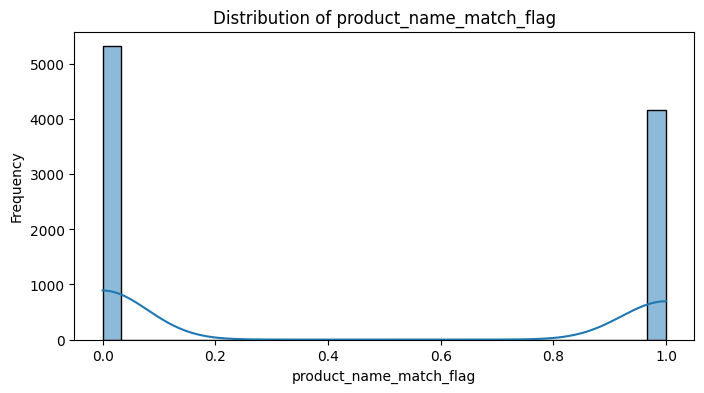

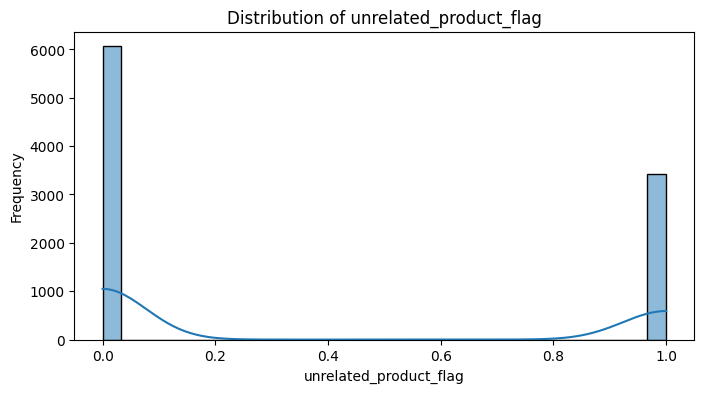

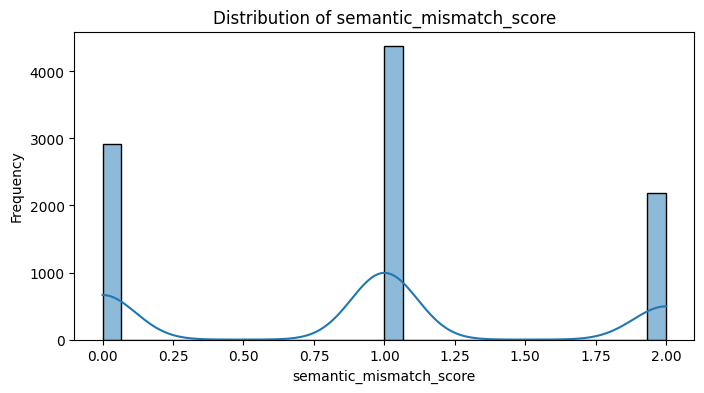

In [ ]:
features_to_plot = [
    'review_length', 'sentiment_polarity', 'username_dup_flag',
    'product_name_match_flag', 'unrelated_product_flag', 'semantic_mismatch_score'
]

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

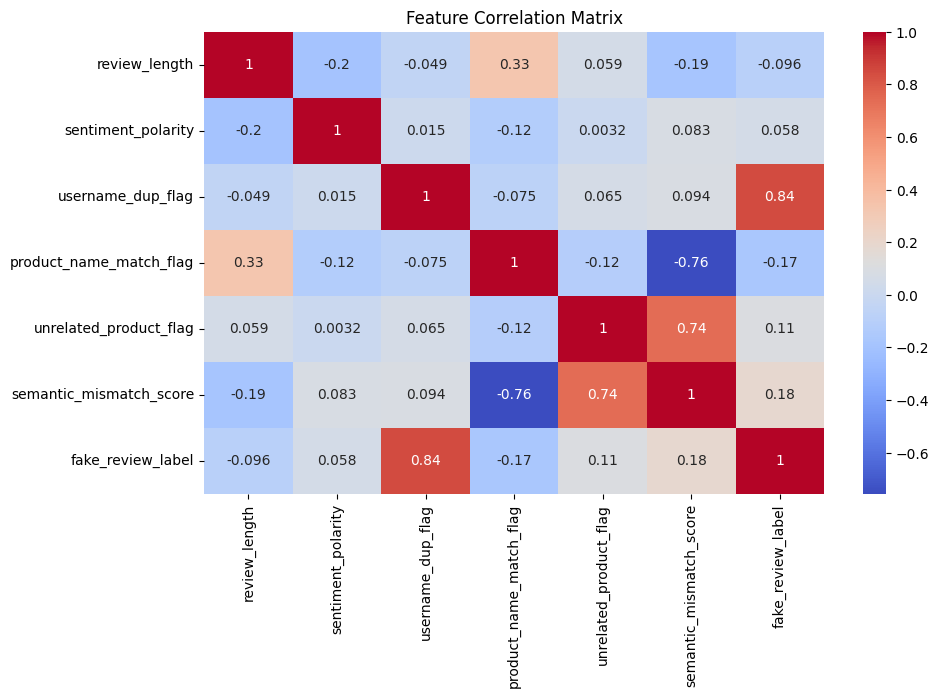

In [ ]:
corr = df[features_to_plot + ['fake_review_label']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

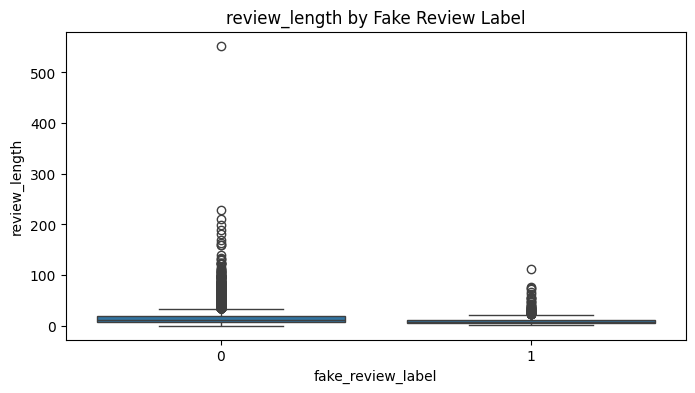

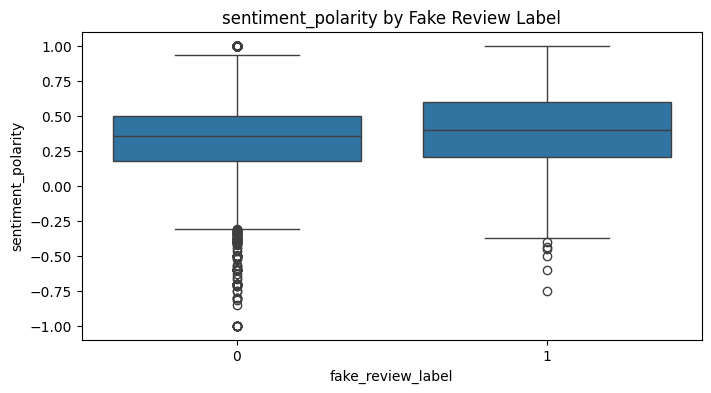

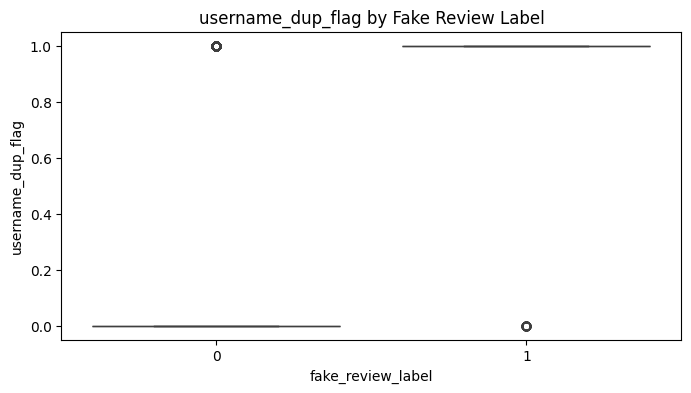

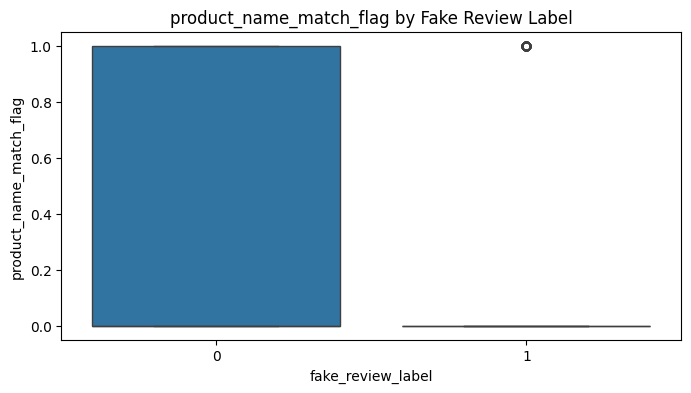

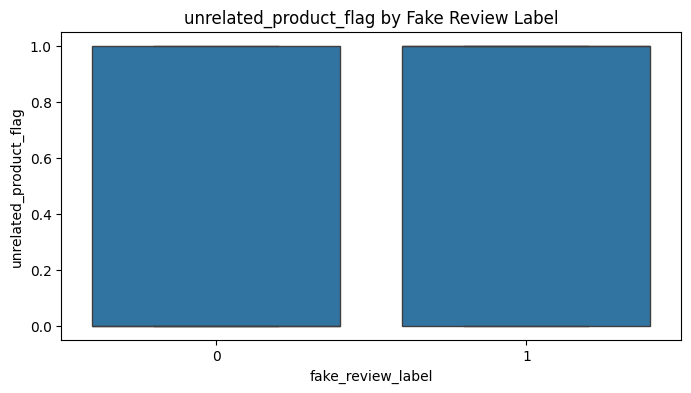

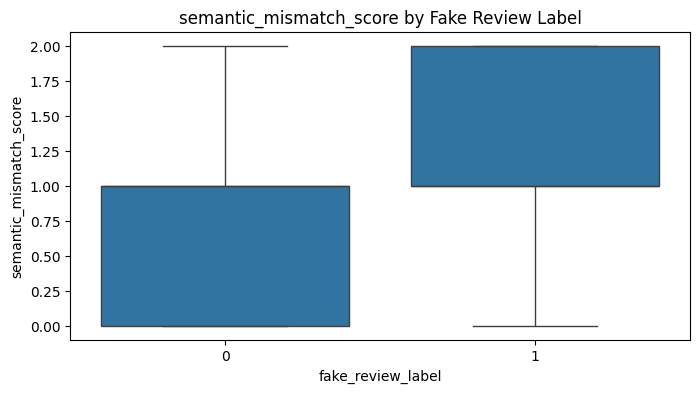

In [ ]:
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='fake_review_label', y=feature, data=df)
    plt.title(f"{feature} by Fake Review Label")
    plt.show()

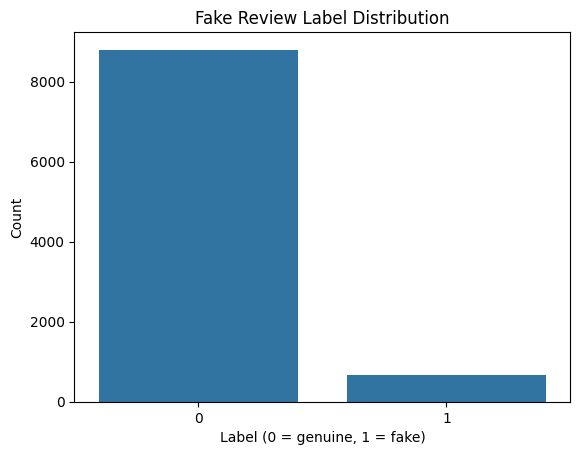

In [ ]:
sns.countplot(x='fake_review_label', data=df)
plt.title("Fake Review Label Distribution")
plt.xlabel("Label (0 = genuine, 1 = fake)")
plt.ylabel("Count")
plt.show()

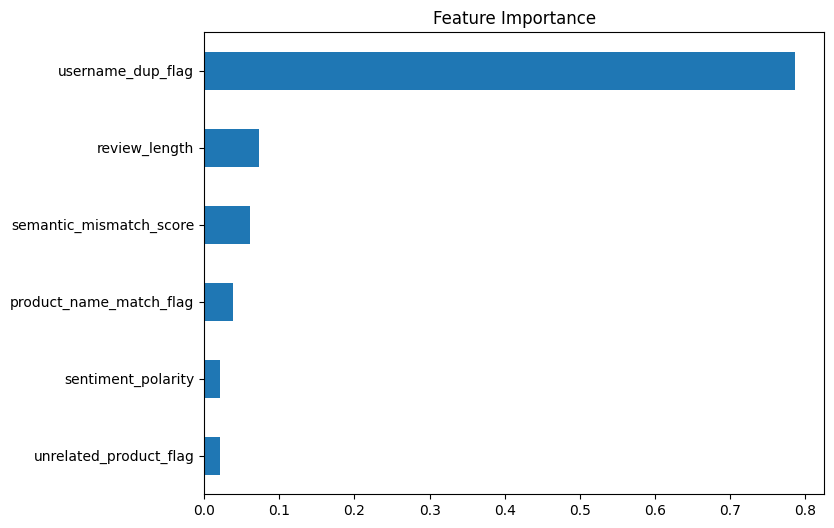

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df[features_to_plot]
y = df['fake_review_label']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6), title="Feature Importance")
plt.show()